In [142]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [160]:
load_file = 'output/adult_results.npz'
# load_file = 'output/adult_results_minority_female.npz'
# load_file = 'output/adult_results_minority_amerindianeskimo.npz'
# load_file = 'output/adult_results_minority_asianpacislander.npz'
# load_file = 'output/adult_results_minority_black.npz'
# load_file = 'output/adult_results_minority_other.npz'

f = np.load(load_file)
orig_results = f['orig_results']
flipped_results = f['flipped_results']
fixed_influence_loo_results = f['fixed_influence_loo_results']
fixed_loss_results = f['fixed_loss_results']
fixed_random_results = f['fixed_random_results']
proportion_counts_influence = f['proportion_counts_influence']
proportion_counts_loss = f['proportion_counts_loss']
proportion_counts_random = f['proportion_counts_random']

# female(10323), male(21333), amerindianeskimo(307), asianpacislander(939), black(2994), other(226), white(27190)
print(proportion_counts_influence[0, 0, :, :])
print(proportion_counts_loss[0, 0, :, :])
print(proportion_counts_random[0, 0, :, :])


[[ 425. 1475.   57.  378.  141.   70. 1254.]
 [ 903. 2897.  105.  539.  333.  103. 2720.]
 [1379. 4321.  135.  632.  524.  128. 4281.]
 [1742. 5858.  153.  690.  676.  145. 5936.]
 [2109. 7391.  167.  724.  810.  153. 7646.]
 [2464. 8936.  176.  757.  953.  162. 9352.]]
[[4.8200e+02 1.4180e+03 1.4000e+01 7.0000e+01 1.2700e+02 8.0000e+00
  1.6810e+03]
 [7.2500e+02 3.0750e+03 2.6000e+01 1.2300e+02 2.3300e+02 1.6000e+01
  3.4020e+03]
 [9.5900e+02 4.7410e+03 3.6000e+01 1.7600e+02 3.3400e+02 2.4000e+01
  5.1300e+03]
 [1.2060e+03 6.3940e+03 4.6000e+01 2.2100e+02 4.1900e+02 2.9000e+01
  6.8850e+03]
 [1.4450e+03 8.0550e+03 5.8000e+01 2.6800e+02 5.1100e+02 3.5000e+01
  8.6280e+03]
 [1.6710e+03 9.7290e+03 7.2000e+01 3.2500e+02 6.0500e+02 4.3000e+01
  1.0355e+04]]
[[ 605. 1295.   17.   49.  183.   24. 1627.]
 [1249. 2551.   41.  102.  365.   37. 3255.]
 [1821. 3879.   57.  165.  539.   47. 4892.]
 [2440. 5160.   80.  221.  713.   62. 6524.]
 [3068. 6432.   97.  276.  899.   74. 8154.]
 [3649. 775

Fraction of flips: 0.1


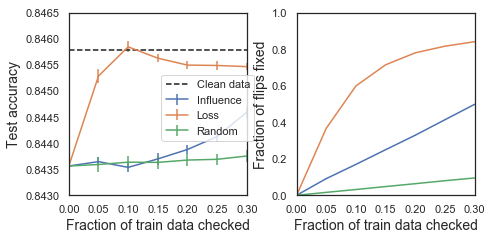

In [156]:
sns.set_style('white')
fontsize=14

x = np.arange(0, 0.35, 0.05)
metric_idx = 0

flip_mean = np.mean(flipped_results, axis=1)
flip_error = np.std(flipped_results, axis=1) / np.sqrt(flipped_results.shape[1])

fig, axs = plt.subplots(1, 2, figsize=(7,3.5))

# flip_idx = 0, 1, 2, 3, 4, 5 represents fraction of mislabels (0.05, 0.10, 0.15, 0.20, 0.25, 0.30)
flip_idx = 1
print("Fraction of flips: %s" % ((flip_idx + 1) * 0.05))

if len(load_file) > 24:
    if load_file[30:32] == 'fe':  # female
        num_train_examples = 10323
    elif load_file[30:32] == 'am':  # amerindianeskimo
        num_train_examples = 307
    elif load_file[30:32] == 'as':  # asianpacislander
        num_train_examples = 939
    elif load_file[30:32] == 'bl':  # black
        print('bl')
        num_train_examples = 2994
    elif load_file[30:32] == 'ot':  # other
        num_train_examples = 226
else:
    num_train_examples = 31656
    
num_flips = int(num_train_examples / 20) * (flip_idx + 1)  

for ax, metric_idx in zip(axs, [2, 0]):
    for results, label in [
        (fixed_influence_loo_results, 'Influence'),
        (fixed_loss_results, 'Loss'), 
        (fixed_random_results, 'Random')]:
        mean = np.mean(results, axis=2)[flip_idx, :, metric_idx]
        error = np.std(results, axis=2)[flip_idx, :, metric_idx] / np.sqrt(results.shape[2])
        mean = np.insert(mean, 0, flip_mean[flip_idx, metric_idx]) 
        error = np.insert(error, 0, flip_error[flip_idx, metric_idx])

        if metric_idx == 0:
            mean /= num_flips
            error /= num_flips
            
        ax.errorbar(
            x, 
            mean,
            error,
            label=label)
        ax.set_xlim((0, 0.30))
        ax.set_xticks(x)
        ax.set_xlabel('Fraction of train data checked', fontsize=fontsize)

    if metric_idx > 0:
        ax.plot(
            x, 
            [orig_results[metric_idx - 1]] * len(x),
            '--',
            color='k',
            label='Clean data')
        ax.legend(loc=(0.52,0.30), fontsize=fontsize-3)          
        ax.set_ylim((0.843, 0.8465))
        ax.set_ylabel('Test accuracy', fontsize=fontsize)

    else:
        ax.set_ylim((0, 1))
      
        ax.set_ylabel('Fraction of flips fixed', fontsize=fontsize)

plt.tight_layout()
plt.subplots_adjust(wspace=0.28)

plt.savefig('../figs/fig-adult-female.png', dpi=600, bbox_inches='tight')